# Predicting Customer Response to Telemarketing Campaigns for Term Deposit

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [151]:
raw_data = pd.read_csv('D:\\data science\\aasigment\\assigment data set\\bank-full.csv', delimiter=';')
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Exploration

A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [152]:
print(raw_data.shape)
raw_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [153]:
raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [154]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [155]:
raw_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [156]:
raw_data[raw_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Numerical Variables

In [159]:
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
raw_data[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [160]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 0


In [161]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [163]:
raw_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


# Exploratory Data Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

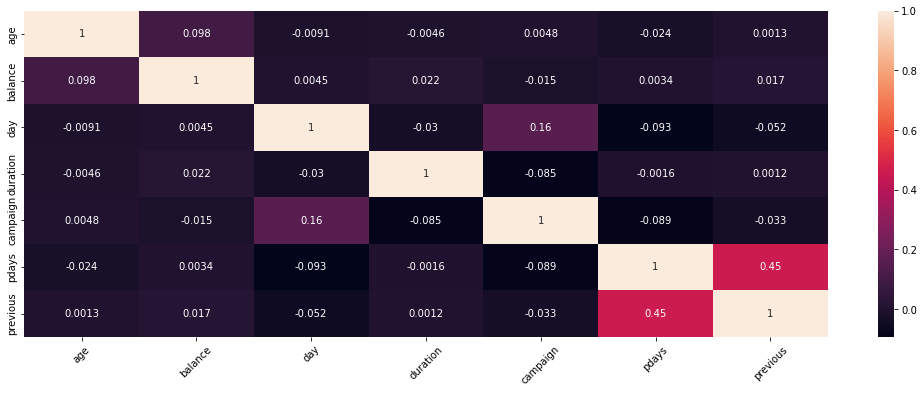

In [16]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

# Outliers Detection

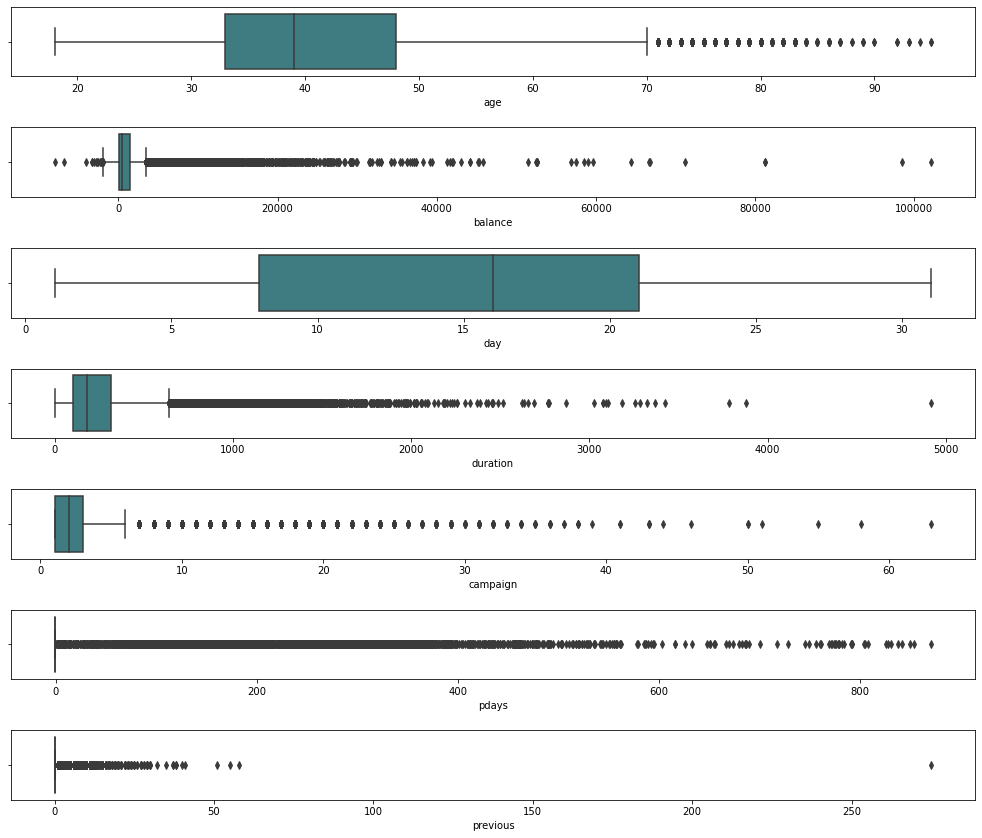

In [17]:
ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

Observation : There are lots of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

# Categorical Variables

In [18]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), 
      '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [19]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


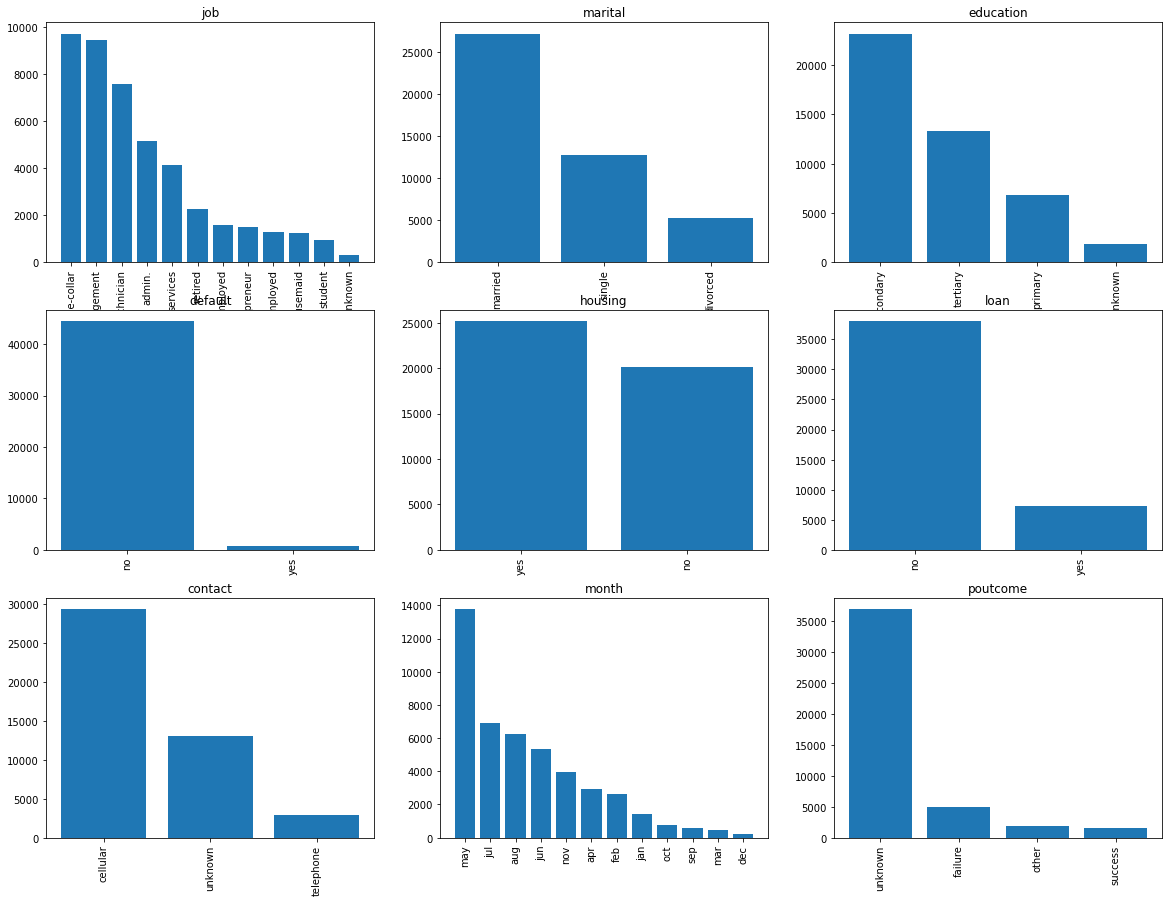

In [21]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = raw_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

# Analysis of the response column (Y)

In [22]:
countNotermdeposit = len(raw_data[raw_data.y == 'no'])
counthavetermdeposit = len(raw_data[raw_data.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(raw_data.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(raw_data.y))*100)))

Percentage of Customer doesn't have a term deposit: 88.30%
Percentage of Customer have a term deposit: 11.70%


In [23]:
raw_data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Whether the client has subscribed a term deposit or not ')

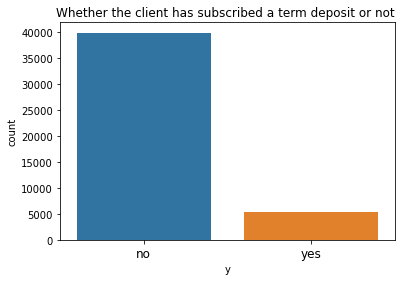

In [28]:
sns.countplot(x='y', data=raw_data, 
              order=raw_data['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has subscribed a term deposit or not ')

# Data Visualization

Analyzing the relationship of categorical features with respect to the Target feature

<AxesSubplot:title={'center':'Job and deposit'}>

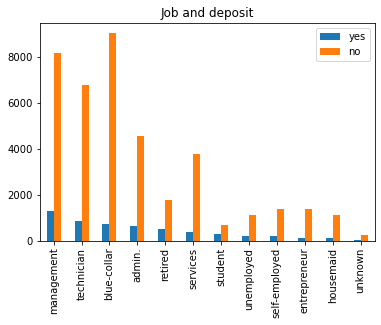

In [29]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['job'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

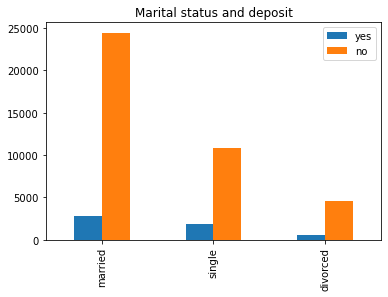

In [30]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['marital'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

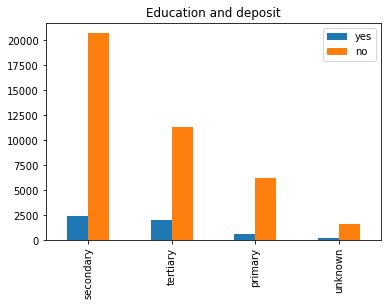

In [31]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['education'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

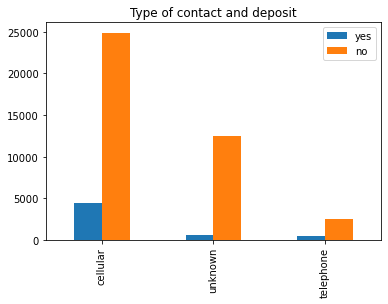

In [32]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['contact'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

<AxesSubplot:title={'center':'Type of possible outcome and deposit'}>

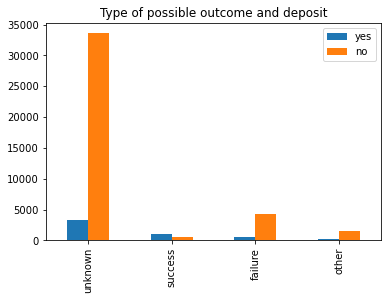

In [33]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['poutcome'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'Type of possible outcome and deposit')

<AxesSubplot:title={'center':'Loan and deposit'}>

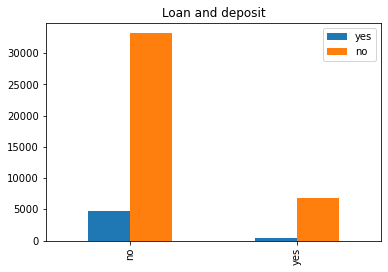

In [34]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['loan'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['loan'].value_counts()

j_df.plot.bar(title = 'Loan and deposit')

# Analyzing Relation by plotting Continuous features with the Target Feature

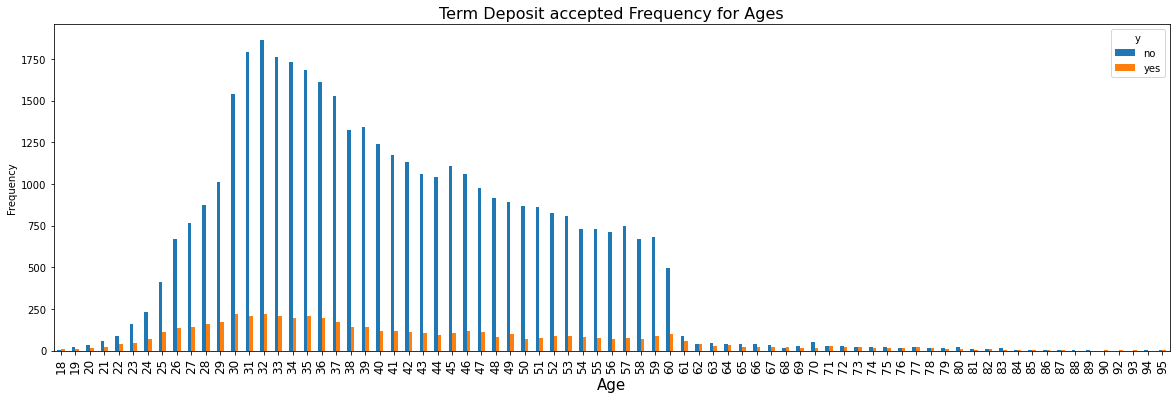

In [164]:
pd.crosstab(raw_data.age,raw_data.y).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

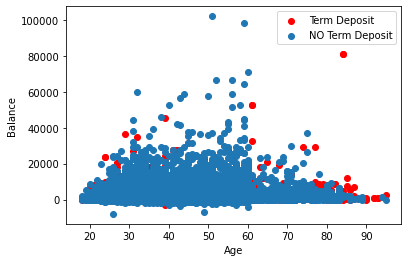

In [37]:
plt.scatter(x=raw_data.age[raw_data.y== 'yes'], y=raw_data.balance[(raw_data.y== 'yes')], c="red")
plt.scatter(x=raw_data.age[raw_data.y== 'no'], y=raw_data.balance[(raw_data.y== 'no')])
plt.legend(["Term Deposit", "NO Term Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

# Visualize the subscription and contact rate by age

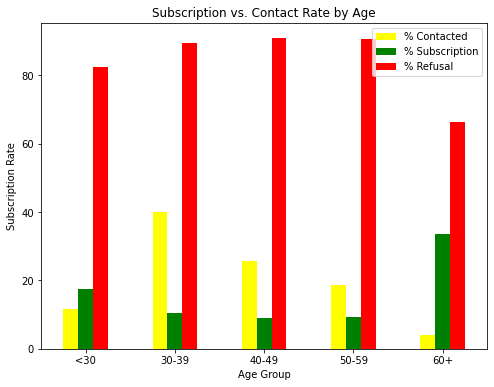

In [38]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Contacted','% Subscription','% Refusal']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('yellow','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

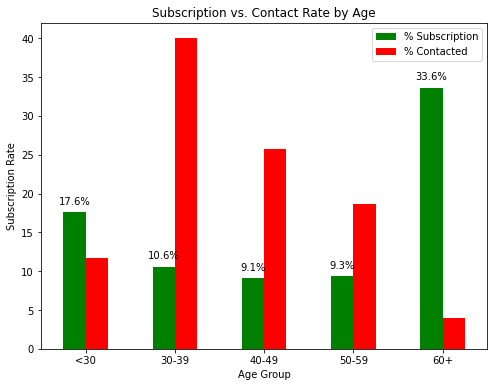

In [39]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Observation : clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

# Visualize the subscription rate by balance level

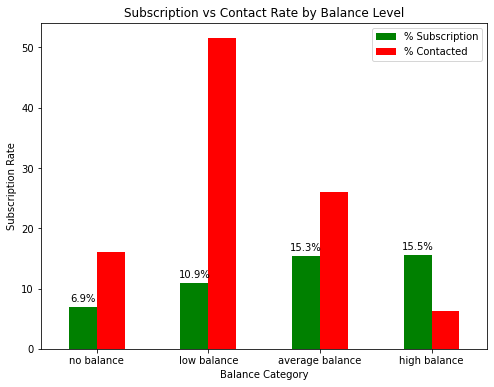

In [40]:
lst = [raw_data]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(raw_data['y'],raw_data['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Observation : Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, nearly 15%.
more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.

# Visualize the subscription rate by age and balance

In [42]:
# Step 1: Change column name: 'y' to 'response'
df  =raw_data.copy()
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

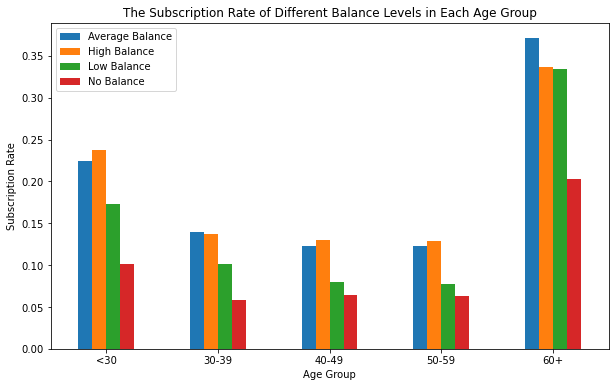

In [43]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

Observation : the bank should prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is young clients with positive balances, who showed high subscription rates between 15% and 20%.

# Visualize the subscription rate by job

In [46]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [47]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct


response,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


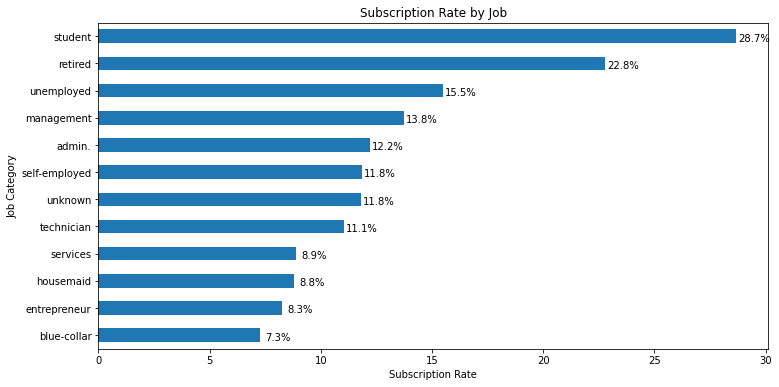

In [48]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Observation : students and retired clients account have more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

# Visualize the relationship between 'duration' & 'campaign': with response result

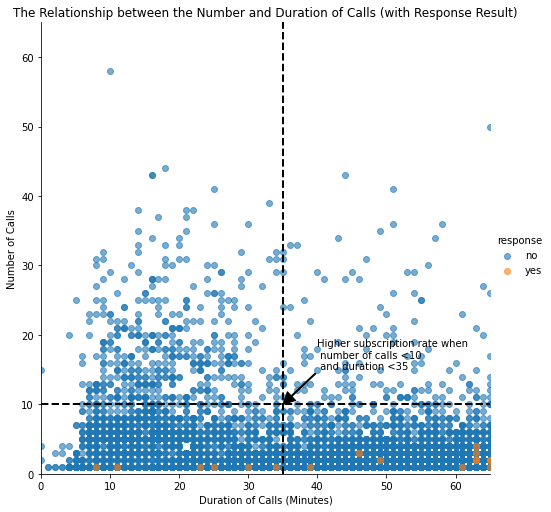

In [54]:
df1 = df.copy()
dur_cam = sns.lmplot(x='duration', y='campaign',data = df1,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=10, linewidth=2, color="k", linestyle='--')
plt.axvline(x=35, linewidth=2, color="k", linestyle='--' )
plt.annotate("Higher subscription rate when \n number of calls <10 \n and duration <35",xytext = (40,15),
             arrowprops=dict(color = 'k', width=1),xy=(35,10))
plt.show()

Observation : As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after 6 campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

# Visualize the subscription and contact rate by month

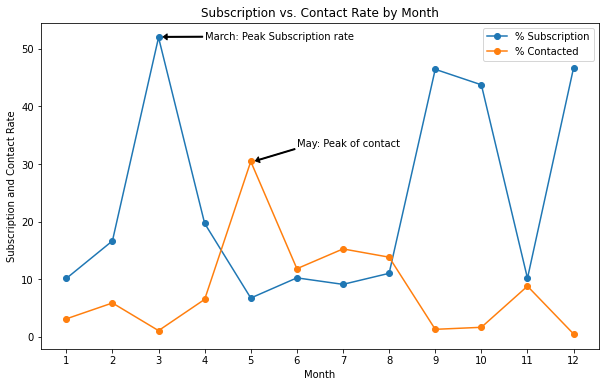

In [56]:
# Step 4: Change 'month' from words to numbers for easier analysis
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['response'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

# Visualize the subscription rate by Education

In [171]:
df.education.unique()

array(['tertiary', 'secondary', 'other', 'primary'], dtype=object)

In [58]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct

response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


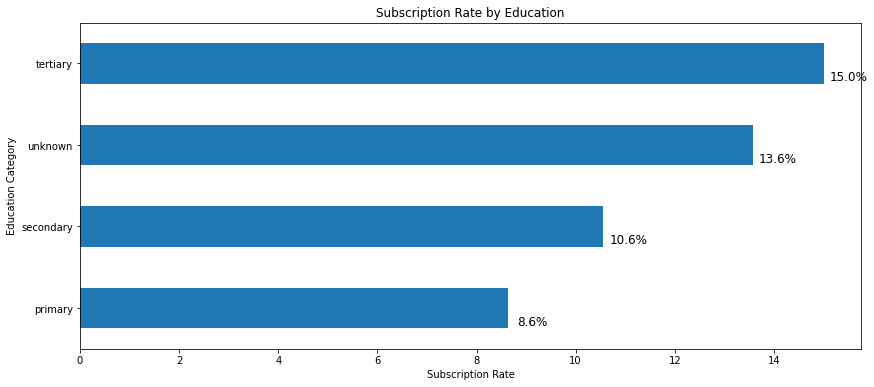

In [59]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom',
                fontsize = 'large')

# Clean the dataset

Deal with missing data and unknow data values

In [60]:
cols = [col for col in raw_data.columns]
col_missing = []
for col in cols:
    if 'unknown' in raw_data[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing) 

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


In [61]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",raw_data[raw_data[col].str.contains('unknown')][col].count())

Unknown values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [62]:
print(raw_data.groupby(raw_data['job'])['job'].count(),"\n")

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [63]:
print(raw_data.groupby(raw_data['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [64]:
print(raw_data.groupby(raw_data['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [65]:
print(raw_data.groupby(raw_data['contact'])['contact'].count(),"\n")

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



# Creating and transforming data

In [214]:
df = raw_data.copy()

In [215]:
# Step 2: Replace 'unknown' in job and education with 'other'
df[['job','education','contact','poutcome']] = df[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [216]:
df.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [217]:
# Custom Binary Encoding of Binary o/p variables 
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0


# Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [218]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,other,may,other
1,technician,single,secondary,other,may,other
2,entrepreneur,married,secondary,other,may,other
3,blue-collar,married,other,other,may,other
4,other,single,other,other,may,other


In [219]:
categorical.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [220]:
dummies = pd.get_dummies(categorical)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [221]:
# concatination of two dataframes 'bank' and 'dummies'
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)


In [222]:
# To see all columns
pd.set_option("display.max.columns", None)
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [223]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [224]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

In [225]:
df1 = raw_data.copy()

In [226]:
# Label Encoding of categrical variables
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df1['job']= label_encoder.fit_transform(df1['job'])
df1['month']= label_encoder.fit_transform(df1['month'])
df1['marital']= label_encoder.fit_transform(df1['marital'])
df1['education']= label_encoder.fit_transform(df1['education'])
df1['contact']= label_encoder.fit_transform(df1['contact'])
df1['poutcome']= label_encoder.fit_transform(df1['poutcome'])
df1['default']= label_encoder.fit_transform(df1['default'])
df1['housing']= label_encoder.fit_transform(df1['housing'])
df1['loan']= label_encoder.fit_transform(df1['loan'])
df1['y']= label_encoder.fit_transform(df1['y'])
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [228]:
# Change the unit of 'duration' from seconds to minutes
df1['duration'] = df1['duration'].apply(lambda n:n/60).round(2)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,4.35,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,2.52,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1.27,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1.53,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,3.30,1,-1,0,3,0


# Applying Standard Scaler

In [229]:
from sklearn.preprocessing import StandardScaler

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.256419,1.606965,0.011014,0,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,-0.437895,0.288529,-0.415353,0,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.446762,-0.747384,-0.706586,0,1,1,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.047205,0.571051,-0.646010,0,1,0,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-0.447091,-0.747384,-0.233623,0,0,0,5,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# split data

In [230]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [232]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 47)
Shape of X_test:  (9043, 47)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [233]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [234]:
# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [235]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False False  True False
  True  True  True  True False  True  True  True  True  True  True]
[22 32  1 30  1  3 31 19 33 28 13 16 12  8 25 17  6 24 18  1 27 15 20  9
 29 26  7 23 14  4  1  5 21  2  1 11  1  1  1  1 10  1  1  1  1  1  1]


In [236]:
x_train.columns[rfe.support_]

Index(['duration', 'housing', 'job_student', 'contact_other', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [237]:
import statsmodels.api as sm

In [238]:
col1 = x_train.columns[rfe.support_]
x_train_sm = sma.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36153
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8753.0
Date:                Wed, 14 Jun 2023   Deviance:                       17506.
Time:                        22:29:27   Pearson chi2:                 1.63e+07
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2111
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8741      0.032    -27.738      0.000      -0.936      -0.812
duration             1.0883      0.018     59.039      0.000       1.052       1.124
housing             -0.6537      0.044    -14.941      0.000      -0.740      -0.568
job_student          0.7082      0.104      6.842      0.000       0.505       0.911
contact_other       -1.8259      0.078    -23.315      0.000      -1.979      -1.672
month_dec            1.1853      0.181      6.537      0.000       0.830       1.541
month_jan           -0.5709      0.117     -4.862      0.000      -0.801      -0.341
month_jul           -0.5700      0.063     -9.019      0.000      -0.694      -0.446
month_jun            0.9082      0.080     11.377      0.000       0.752       1.065
month_mar            2.1601      0.118     18.366      0.000       1.930       2.391
month_nov           -0.4213      0.074     -5.688      0.000      -0.566      -0.276
month_oct            1.4569      0.106     13.713      0.000       1.249       1.665
month_sep            1.4589      0.120     12.184      0.000       1.224       1.694
poutcome_failure    -1.0432      0.048    -21.918      0.000      -1.136      -0.950
poutcome_other      -1.1695      0.030    -38.869      0.000      -1.229      -1.111
poutcome_success     1.3386      0.055     24.549      0.000       1.232       1.446
====================================================================================
"""

We can see that none of the variables here have high p-values i.e. greater than 0.05. So there is do not need to drop any of the features before moving ahead

In [239]:
# predicted values of the train dataset giving the probability
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

14001    0.018470
32046    0.678149
13318    0.064301
42991    0.038482
14237    0.049444
14360    0.021600
36635    0.050503
37042    0.033069
25994    0.048321
14555    0.028409
dtype: float64

In [240]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.01846971, 0.67814896, 0.06430088, 0.03848191, 0.04944441,
       0.02159976, 0.05050276, 0.03306892, 0.04832055, 0.02840913])

# Creating the dataframe with the actual subscription flag and the predicted probabilities

In [241]:
y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.018470,14001
1,1,0.678149,32046
2,0,0.064301,13318
3,0,0.038482,42991
4,0,0.049444,14237
5,0,0.021600,14360
6,0,0.050503,36635
7,0,0.033069,37042
8,0,0.048321,25994
9,0,0.028409,14555


# Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [243]:
y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.018470,14001,0
1,1,0.678149,32046,1
2,0,0.064301,13318,0
3,0,0.038482,42991,0
4,0,0.049444,14237,0
5,0,0.021600,14360,0
6,0,0.050503,36635,0
7,0,0.033069,37042,0
8,0,0.048321,25994,0
9,0,0.028409,14555,0


In [244]:
# creating confusion matrix for the following prediction
confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
confusion

array([[7763,  217],
       [ 694,  369]], dtype=int64)

In [245]:
print(ac(y_test_pred_final.Sub, y_test_pred_final.predict))

0.8992590954329316


The accuracy of the model is approximately 90% which is a really good model for prediction

In [246]:
# print the classification report
print('After Feature Selection','\n',report(y_test_pred_final.Sub, y_test_pred_final.predict))

After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [247]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [249]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)

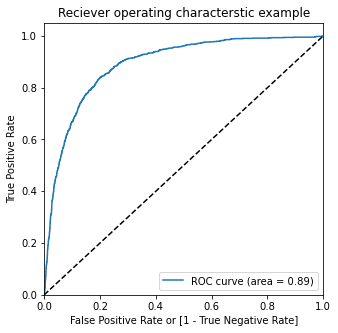

In [250]:
draw_roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)

<AxesSubplot:>

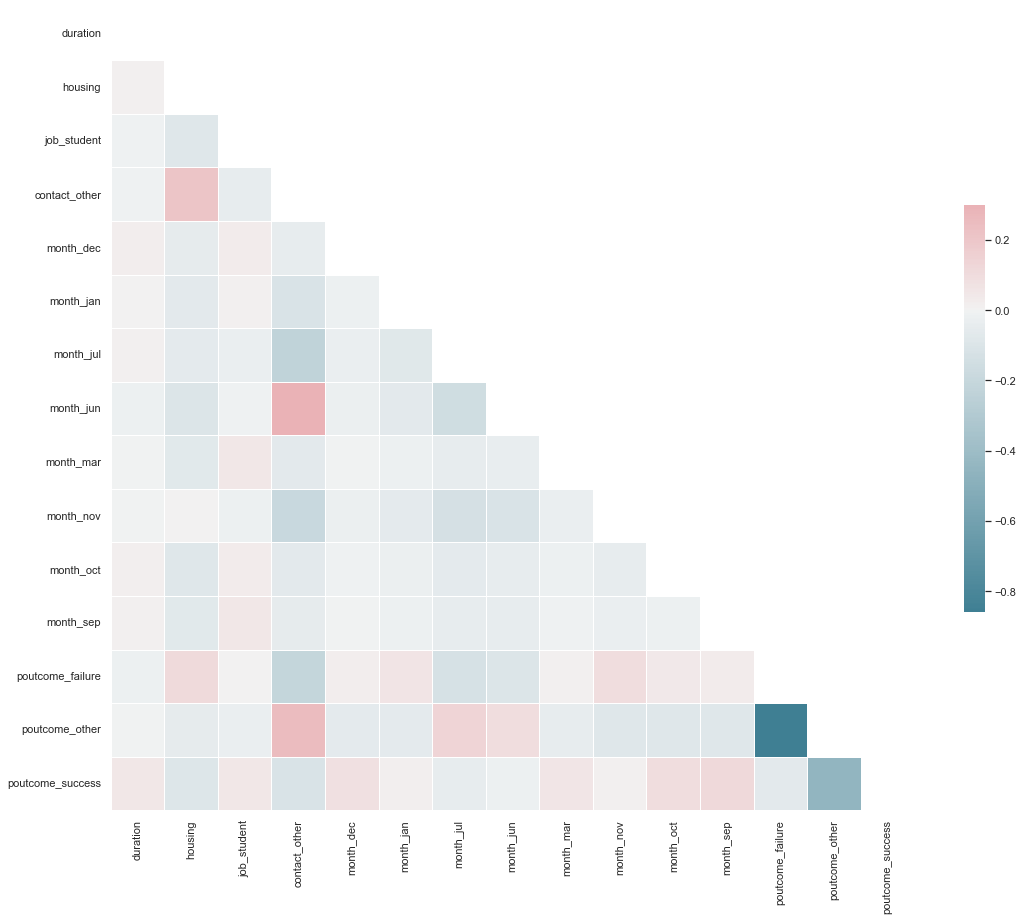

In [251]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

# Sklearn Logistic Regression and Accuracy

In [252]:
accuracy = {}

feature_selection = LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]], y_train)
ACC = feature_selection.score(x_test[x_test.columns[rfe.support_]],y_test)*100

accuracy['Logistic Regression after Feature Selection'] = ACC
print("Test Accuracy {:.2f}%".format(ACC))

Test Accuracy 89.89%


Accuracy on the Feature Selected features have 89.89% Accuracy which is still better as we have eliminated some of the features

In [253]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 89.88%


Accuracy on all the features is approximately same as we have got for the feature selection features

In [255]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_predict = lr.predict(x_test)
y_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])

print('Without Feature Selection','\n', cm(y_test, y_predict))
print('After Feature Selection','\n', cm(y_test, y_pred))

Without Feature Selection 
 [[7757  223]
 [ 692  371]]
After Feature Selection 
 [[7763  217]
 [ 697  366]]


In [259]:
# print the classification report

print('Without Feature Selection','\n',report(y_test, y_predict))
print('After Feature Selection','\n',report(y_test, y_pred))

Without Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043

After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



# predict_proba method

In [261]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
lr.predict_proba(x)[:,1] 

array([0.02178914, 0.01226461, 0.00350544, ..., 0.98274424, 0.1227956 ,
       0.1206505 ])

# Compare the train-set and test-set accuracy
Check for overfitting and underfitting

In [262]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(lr.score(x_train, y_train)*100))
print('Test set score: {:.2f}%'.format(lr.score(x_test, y_test)*100))

Training set score: 90.13%
Test set score: 89.88%


# Compare model accuracy with null accuracy

In [263]:
# check class distribution in test set

y_test.value_counts()

0    7980
1    1063
Name: y, dtype: int64

In [264]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

Mean of 1's 0.1175494857901139 
 Percentage of 1's 12.0 %


In [265]:
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 0's 0.8824505142098861 
 Percentage of 0's 88.0 %


# Confusion matrix

In [266]:
#Predictions
y_predict = lr.predict(x_test)
print(cm(y_test, y_predict))

[[7757  223]
 [ 692  371]]


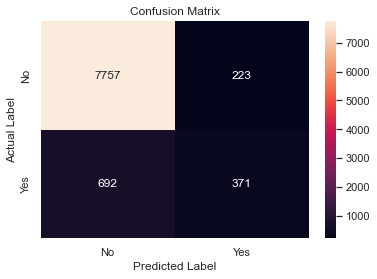

In [267]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [268]:
y_predict = lr.predict(x)
print(cm(y, y_predict))

[[38936   986]
 [ 3500  1789]]


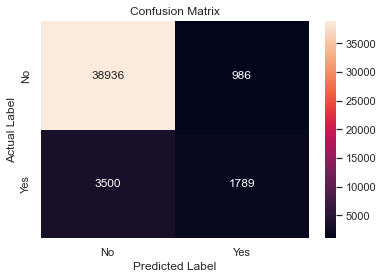

In [269]:
# plot confusion matrix to describe the performance of classifier.
cm_df=cm(y, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

True Positives (TP): we correctly predicted that they do have subscription
223
True Negatives (TN): we correctly predicted that they don't have subscription
7757
False Positives (FP): we incorrectly predicted that they do have subscription (a "Type I error")
692
Falsely predict positive
Type I error
False Negatives (FN): we incorrectly predicted that they don't have subscription (a "Type II error")
371
Falsely predict negative
Type II error

In [273]:
confusion = cm(y_test, y_predict)
print(confusion)

[[7757  223]
 [ 692  371]]


In [274]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix

In [275]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))

0.8988167643481145
0.8988167643481145


# Classification Error: Overall, how often is the classifier incorrect?

In [276]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - ac(y_test, y_predict))

0.10118323565188543
0.10118323565188547


Recall: When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Sensitivity"
TP / all positive
all positive = TP + FN

In [277]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))

0.34901222953904043
0.34901222953904043


In [278]:
specificity = TN / (TN + FP)

print(specificity)

0.9720551378446115


In [279]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.02794486215538847
0.027944862155388495


In [280]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))

0.6245791245791246
0.6245791245791246


In [281]:
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score

0.44779722389861193

# The threshold level

In [282]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.99278752, 0.00721248],
       [0.21264251, 0.78735749],
       [0.98261501, 0.01738499],
       [0.98936151, 0.01063849],
       [0.9770902 , 0.0229098 ],
       [0.97251928, 0.02748072],
       [0.95797159, 0.04202841],
       [0.97236023, 0.02763977],
       [0.93902052, 0.06097948],
       [0.98528842, 0.01471158]])

In [283]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Subscription (0)', 'Prob of - Subscription (1)'])
y_pred_prob_df

,Prob of - No Subscription (0),Prob of - Subscription (1)
0,0.992788,0.007212
1,0.212643,0.787357
2,0.982615,0.017385
3,0.989362,0.010638
4,0.977090,0.022910
5,0.972519,0.027481
6,0.957972,0.042028
7,0.972360,0.027640
8,0.939021,0.060979
9,0.985288,0.014712


Text(0, 0.5, 'Frequency')

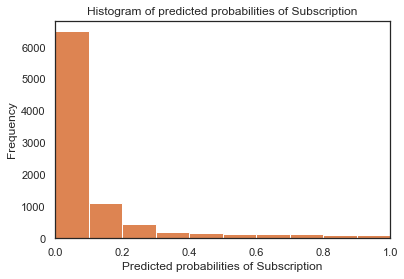

In [284]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = lr.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = lr.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

Observations :-
We can see that the above histogram is highly positive skewed.
The first column tell us that there are approximately 6000 observations with probability between 0.0 and 0.1.
There are small number of observations with probability > 0.5.
So, these small number of observations predict that there will be a Subscription.
Majority of observations predict that there will be no Subscription.

# Lower the Threshold

In [285]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = lr.predict_proba(x_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
       
    cm1 = cm(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',
           
               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
                '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[6349 1631]
 [ 152  911]] 

 with 7260 correct predictions,  

 1631 Type I errors( False Positives),  

 152 Type II errors( False Negatives),  

 Accuracy score:  0.8028309189428287 

 Sensitivity:  0.8570084666039511 

 Specificity:  0.7956140350877193 



With 0.2 threshold the Confusion Matrix is  

 [[7240  740]
 [ 373  690]] 

 with 7930 correct predictions,  

 740 Type I errors( False Positives),  

 373 Type II errors( False Negatives),  

 Accuracy score:  0.8769213756496738 

 Sensitivity:  0.6491063029162747 

 Specificity:  0.9072681704260651 



With 0.3 threshold the Confusion Matrix is  

 [[7536  444]
 [ 535  528]] 

 with 8064 correct predictions,  

 444 Type I errors( False Positives),  

 535 Type II errors( False Negatives),  

 Accuracy score:  0.8917394669910428 

 Sensitivity:  0.4967074317968015 

 Specificity:  0.9443609022556391 



With 0.4 threshold the Confusion Matrix is  

 [[7664  316]
 [ 614  449]] 

 w

# ROC - AUC

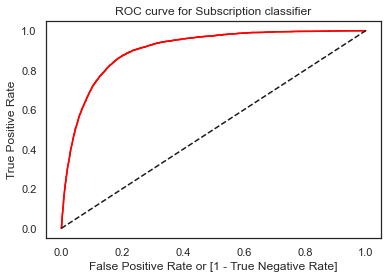

AUC-ROC Score: 0.660533683691826


In [286]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)

# ROC AUC Score

In [287]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_predict)
print(curve)

0.660533683691826


# Finding the Optimcal Threshold Value

In [292]:
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y, y_pred, normalize=True))  
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1565,0.416227,0.902258
1567,0.416130,0.902258
1578,0.413973,0.902236
1564,0.416410,0.902236
1566,0.416208,0.902236


# Classification Report

In [297]:
print(report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



# Predictions

In [298]:
#Predictions
y_pred = lr.predict(x)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0
